In [1]:
import folium
from matplotlib import colors as mcolors

In [2]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as pp
import numpy as np
import json
import requests
from datetime import datetime
import time


In [3]:
m = folium.Map(
    location=[60, 18],
    zoom_start=5, control_scale=True )

In [4]:
m

In [5]:
url='https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/1.json'
response=requests.get(url) 
data4=json.loads(response.text)
df4=DataFrame(data4['station'])
df4.columns
#print(df4.name)
print(df4[['latitude','longitude','id','name','height','active']] )


     latitude  longitude        id                    name   height  active
0     59.3098    14.2919  17121000  1712 Ristjärn Fjärryta    0.000    True
1     65.5300    14.9700    154860         Abelvattnet Aut  665.000   False
2     68.3538    18.8166    188800                  Abisko  393.380   False
3     68.3538    18.8164    188790              Abisko Aut  392.303    True
4     65.9857    18.9195    158990                  Abraur  368.079    True
..        ...        ...       ...                     ...      ...     ...
952   66.2646    22.8365    172790      Överkalix-Svartbyn   46.000   False
953   66.2618    22.8427    172770    Överkalix-Svartbyn A   61.024    True
954   66.3860    23.6155    173810              Övertorneå   59.508    True
955   63.7788    13.0734    133470                 Överäng  450.000   False
956   58.3500    16.8333     86700             Övre Gränsö    5.000   False

[957 rows x 6 columns]


In [6]:
df5=df4[(df4.active==True)]
print(len(df5))
#df6=df5[(df5.id<10000000)]
#print(len(df6))
I=0
for i in df5.id:
#    print(i)

    print(I)
    url='https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/1/station/'+str(i)+'/period/latest-hour/data.json'
    url2='https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/6/station/'+str(i)+'/period/latest-hour/data.json'
    response=requests.get(url)
    if response.status_code == 200:
        data=json.loads(response.text)
        df=DataFrame(data['value'])
        if df.empty == 0:
            _=df.rename(columns={'value':'T'},inplace=True)
            df['date'] = pd.to_datetime(df['date']/1000,unit='s') 
            df['id'] = i 
            if I==0:
                df7=df
            else:
                df7=pd.concat([df7,df],axis=0, join='outer')
    response=requests.get(url2)
    if response.status_code == 200:
        data=json.loads(response.text)
        df=DataFrame(data['value'])
        if df.empty == 0:
            _=df.rename(columns={'value':'rh'},inplace=True)
            df['date'] = pd.to_datetime(df['date']/1000,unit='s') 
            df['id'] = i 
            if I==0:
                df7rh=df
            else:
                df7rh=pd.concat([df7rh,df],axis=0, join='outer')
            I+=1


299
0
0
1
1
2
2
2
3
4
5
5
5
5
6
7
7
7
8
9
10
11
11
12
12
13
14
15
16
17
18
18
19
20
21
21
22
22
23
24
24
25
26
26
26
27
27
28
29
29
30
31
31
32
33
34
35
35
36
37
38
38
39
40
41
41
42
42
42
43
44
45
46
47
48
49
50
50
51
52
53
54
54
54
55
56
57
58
59
59
59
60
60
61
61
61
62
63
63
63
63
64
65
65
66
66
67
67
67
68
69
70
71
71
72
72
73
73
74
75
76
77
78
79
80
81
82
83
84
84
84
85
86
87
87
88
88
89
89
90
90
91
91
91
92
92
93
93
94
95
95
95
95
96
96
97
98
99
100
101
102
102
103
103
103
103
104
105
105
106
107
107
108
109
110
111
112
112
113
114
115
115
115
115
115
115
115
116
117
118
119
120
121
121
121
121
122
123
124
125
126
126
126
127
127
128
128
128
129
129
130
131
132
133
134
134
134
134
135
136
137
137
138
139
140
141
142
143
143
144
144
144
145
146
147
148
149
150
151
151
151
152
153
154
154
155
155
156
157
158
159
159
160
161
162
162
163
164
165
166
167
167
167
168
169
169
170
171
172
173
174
174
174
174
175
175
176
177
177
178
178
179
180
181
182
182
183
183
183
183
184
185
186
186


In [7]:
df8=df5.merge(df7,how='inner',on='id') 
df8=df8.merge(df7rh,how='inner',on='id') 
df8['T'] = df8['T'].astype('float')
df8['rh'] = df8['rh'].astype('float')
df8['longitude'] = df8['longitude'].astype('float')
df8['latitude'] = df8['latitude'].astype('float')

print(df8)

                           name                         owner ownerCategory  \
0                    Abisko Aut  Polarforskningssekretariatet       CLIMATE   
1                      Adelsö A                          SMHI       CLIMATE   
2                    Arjeplog A                          SMHI       CLIMATE   
3                  Arvidsjaur A                          SMHI       CLIMATE   
4                      Arvika A                          SMHI       CLIMATE   
..                          ...                           ...           ...   
189     Örnsköldsviks Flygplats       Örnsköldsvik Airport AB       CLIMATE   
190                    Örskär A                          SMHI       CLIMATE   
191            Östergarnsholm A                          SMHI       CLIMATE   
192  Östersund-Frösön Flygplats                      Swedavia       CLIMATE   
193        Överkalix-Svartbyn A                          SMHI       CLIMATE   

    measuringStations      id   height  latitude  l

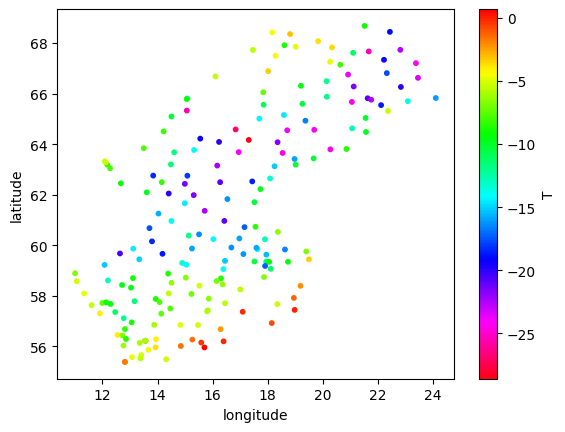

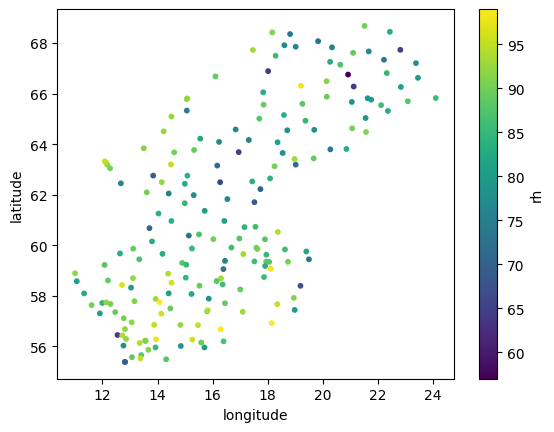

In [8]:
df8.plot.scatter(x = 'longitude', y = 'latitude', c= 'T', s = 10, colormap='hsv_r');

df8.plot.scatter(x = 'longitude', y = 'latitude', c= 'rh', s = 10, colormap='viridis');
pp.show()

In [9]:
geo=df8[['latitude','longitude','T']]
m = folium.Map(
    location=[geo.latitude.mean(), geo.longitude.mean()],tiles="Stamen Terrain",
    zoom_start=5, control_scale=True 
)

In [10]:

import branca.colormap as cm
#from matplotlib import cmm
#colormap = cm.LinearColormap(colors=['blue','red'], vmin=-30,vmax=0)
colormap = cm.LinearColormap(colors=['pink','purple','darkblue','blue','lightblue','cyan','green','lightgreen','yellow','orange','red','brown'], index=range(-40,15,5),vmin=-30,vmax=15)
#cm.linear.RdGy.to_step(10).scale(5, 100)
#colormap = cm.LinearColormap(colors='jet', index=[-20,10],vmin=-20,vmax=20)
#colormap = cm.LinearColormap(colors=['darkblue','red'], index=[-40,10],vmin=-40,vmax=10)
#lat = list(df.latitude)
#lon = list(df.longitude)
#pow = list(df.power)
dat=df8["date_x"].iloc[0]
geo=df8[['latitude','longitude','T']]
#m = folium.Map(
#    location=[geo.latitude.mean(), geo.longitude.mean()],tiles="Stamen Terrain",
#    zoom_start=7, control_scale=True 

m = folium.Map(
    location=[60, 16],tiles="Stamen Terrain",
    zoom_start=7, control_scale=True 

)
for index, location_info in geo.iterrows():
    color=colormap(location_info["T"])
    folium.CircleMarker(        
        [location_info["latitude"], location_info["longitude"]],
        radius=10,
        fill=True,
        color=color,
        fill_color=color,
        popup=location_info["T"]
    ).add_to(m)
html = f'''\
  <head><title>Temperature map</title></head>\
  <center><h2>Date: </h2>{dat}<br>\
  '''
title_html = f'''
             <head><title>Temperature map</title></head>
             '''
head_html = '''
            <center><h4 style="margin-bottom:5"; width="200px">{dat}</h4></center>
             '''

html = f'''\
<head><title>Temperature map</title></head>\
<center><h2>{dat} </h2><br /></center>\
'''

m.get_root().html.add_child(folium.Element(html))

#m.get_root().html.add_child(folium.Element(head_html))


#folium.Map(title="Your map title")



m

#m.save("index.html")


In [11]:
#m.save("index.html")


In [12]:
import io
from PIL import Image

In [13]:
img_data = m._to_png(1)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')